In [11]:
import numpy as np
import tensorflow as tf
import keras 
from keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D, Dropout, Input
#from keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm 
import os
import re
#import skimage
#from skimage.metrics import structural_similarity as ssim
#from skimage.metrics import mean_squared_error
#from image_similarity_measures.quality_metrics import fsim, issm
import pandas as pd
from numpy import asarray
from sewar.full_ref import mse, rmse, psnr, uqi,ergas, scc, rase, sam, msssim, vifp, uqi


In [12]:
# to get the files in proper order
def sorted_alphanumeric(data):  
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)',key)]
    return sorted(data,key = alphanum_key)


# defining the size of image 
SIZE = 256

image_path = '/Users/wayne0032/Documents/Applied-Data-Mining/CUHK-Dataset/CUHK_training_cropped_photos/'
img_array = []

sketch_path = '/Users/wayne0032/Documents/Applied-Data-Mining/CUHK-Dataset/CUHK_training_cropped_sketches/'
sketch_array = []

image_file = sorted_alphanumeric(os.listdir(image_path))
sketch_file = sorted_alphanumeric(os.listdir(sketch_path))

for i in tqdm(image_file):
    image = cv2.imread(image_path + '/' + i,1)
    
    # as opencv load image in bgr format converting it to rgb
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # resizing images 
    image = cv2.resize(image, (SIZE, SIZE))
    
    # normalizing image 
    image = image.astype('float32') / 255.0
    
    #appending normal normal image    
    img_array.append(asarray(image))

    # Image Augmentation
    
    # horizontal flip 
    img1 = cv2.flip(image,1)
    img_array.append(asarray(img1))
     #vertical flip 
    img2 = cv2.flip(image,-1)
    img_array.append(asarray(img2))
     #vertical flip 
    img3 = cv2.flip(image,-1)
    # horizontal flip
    img3 = cv2.flip(img3,1)
    img_array.append(asarray(img3))
    # rotate clockwise 
    img4 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    img_array.append(asarray(img4))
    # flip rotated image 
    img5 = cv2.flip(img4,1)
    img_array.append(asarray(img5))
     # rotate anti clockwise 
    img6 = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
    img_array.append(asarray(img6))
    # flip rotated image 
    img7 = cv2.flip(img6,1)
    img_array.append(asarray(img7))

for i in tqdm(sketch_file):
    image = cv2.imread(sketch_path + '/' + i,1)
    
    # as opencv load image in bgr format converting it to rgb
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # resizing images 
    image = cv2.resize(image, (SIZE, SIZE))
    
    # normalizing image 
    image = image.astype('float32') / 255.0
    # appending normal sketch image
    sketch_array.append(asarray(image))

    #Image Augmentation
    
    # horizontal flip 
    img1 = cv2.flip(image,1)
    sketch_array.append(asarray(img1))
     #vertical flip 
    img2 = cv2.flip(image,-1)
    sketch_array.append(asarray(img2))
     #vertical flip 
    img3 = cv2.flip(image,-1)
    # horizontal flip
    img3 = cv2.flip(img3,1)
    sketch_array.append(asarray(img3))
    # rotate clockwise 
    img4 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    sketch_array.append(asarray(img4))
    # flip rotated image 
    img5 = cv2.flip(img4,1)
    sketch_array.append(asarray(img5))
     # rotate anti clockwise 
    img6 = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
    sketch_array.append(asarray(img6))
    # flip rotated image 
    img7 = cv2.flip(img6,1)
    sketch_array.append(asarray(img7))

100%|██████████| 88/88 [00:00<00:00, 376.68it/s]


In [13]:
image_path_test = '/Users/wayne0032/Documents/Applied-Data-Mining/CUHK-Dataset/CUHK_testing_cropped_photos/'
test_img_array = []

sketch_path_test = '/Users/wayne0032/Documents/Applied-Data-Mining/CUHK-Dataset/CUHK_testing_cropped_sketches/'
test_sketch_array = []

test_image_file = sorted_alphanumeric(os.listdir(image_path_test))
test_sketch_file = sorted_alphanumeric(os.listdir(sketch_path_test))

for i in tqdm(test_image_file):
    image = cv2.imread(image_path_test + '/' + i,1)
    
    # as opencv load image in bgr format converting it to rgb
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # resizing images 
    image = cv2.resize(image, (SIZE, SIZE))
    
    # normalizing image 
    image = image.astype('float32') / 255.0
    
    #appending normal normal image    
    test_img_array.append(asarray(image))

for i in tqdm(test_sketch_file):
    image = cv2.imread(sketch_path_test + '/' + i,1)
    
    # as opencv load image in bgr format converting it to rgb
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # resizing images 
    image = cv2.resize(image, (SIZE, SIZE))
    
    # normalizing image 
    image = image.astype('float32') / 255.0
    # appending normal sketch image
    test_sketch_array.append(asarray(image))

100%|██████████| 100/100 [00:00<00:00, 1173.62it/s]


In [4]:
print("Total number of sketch images:",len(sketch_array))
print("Total number of images:",len(img_array))
print("Total number of sketch images:",len(test_sketch_array))
print("Total number of images:",len(test_img_array))

Total number of sketch images: 704
Total number of images: 704
Total number of sketch images: 100
Total number of images: 100


In [5]:
train_sketch_image = sketch_array
train_image = img_array
test_sketch_image = test_sketch_array
test_image = test_img_array
# reshaping
train_sketch_image = np.reshape(train_sketch_image,(len(train_sketch_image),SIZE,SIZE,3))
train_image = np.reshape(train_image, (len(train_image),SIZE,SIZE,3))
print('Train color image shape:',train_image.shape)
test_sketch_image = np.reshape(test_sketch_image,(len(test_sketch_image),SIZE,SIZE,3))
test_image = np.reshape(test_image, (len(test_image),SIZE,SIZE,3))
print('Test color image shape',test_image.shape)

Train color image shape: (704, 256, 256, 3)
Test color image shape (100, 256, 256, 3)


In [6]:
#Deep auto encoder 

train_sketch_image = np.reshape(train_sketch_image,(len(train_sketch_image),SIZE*SIZE*3))
train_image = np.reshape(train_image, (len(train_image),SIZE*SIZE*3))
print('Train color image shape:',train_image.shape)
test_sketch_image = np.reshape(test_sketch_image,(len(test_sketch_image),SIZE*SIZE*3))
test_image = np.reshape(test_image, (len(test_image),SIZE*SIZE*3))
print('Test color image shape',test_image.shape)

Train color image shape: (704, 196608)
Test color image shape (100, 196608)


In [14]:

# define a 3+3 deep autoencoder
input_img = keras.Input(shape=(SIZE*SIZE*3))
encoded = keras.layers.Dense(SIZE*3, activation='relu')(input_img)
encoded = keras.layers.Dense(256*2, activation='relu')(encoded)
encoded = keras.layers.Dense(256, activation='relu')(encoded)
encoded = keras.layers.Dense(128, activation='relu')(encoded)
encoded = keras.layers.Dense(64, activation='relu')(encoded)

decoded = keras.layers.Dense(128, activation='relu')(encoded)
decoded = keras.layers.Dense(256, activation='relu')(decoded)
decoded = keras.layers.Dense(256*2, activation='relu')(decoded)
decoded = keras.layers.Dense(256*3, activation='relu')(decoded)
decoded = keras.layers.Dense(256*256*3, activation='sigmoid')(decoded)

model_DAE = keras.Model(input_img, decoded)

model_DAE_encoder = keras.Model(input_img, encoded)

# Claim a separate decoder model
decoder_input = keras.Input(shape=(encoded.shape[1]))

# Retrieve the last layer of the autoencoder model
decoder_layer = model_DAE.layers[-5](decoder_input)
decoder_layer = model_DAE.layers[-4](decoder_layer)
decoder_layer = model_DAE.layers[-3](decoder_layer)
decoder_layer = model_DAE.layers[-2](decoder_layer)
decoder_layer = model_DAE.layers[-1](decoder_layer)
# Create the decoder model
model_DAE_decoder = keras.Model(decoder_input, decoder_layer)

In [15]:
import keras
from keras import layers


input_img = keras.Input(shape=(SIZE*SIZE*3))
encoded = keras.layers.Dense(SIZE*3, activation='relu')(input_img)
encoded = keras.layers.Dense(128, activation='relu')(encoded)
encoded = keras.layers.Dense(64, activation='relu')(encoded)

decoded = keras.layers.Dense(128, activation='relu')(encoded)
decoded = keras.layers.Dense(SIZE*3, activation='relu')(decoded)
decoded = keras.layers.Dense(SIZE*SIZE*3, activation='sigmoid')(decoded)

model_DAE = keras.Model(input_img, decoded)

# Claim a separate decoder model
model_DAE_encoder = keras.Model(input_img, encoded)

# Claim a separate decoder model
decoder_input = keras.Input(shape=(encoded.shape[1]))
# Retrieve the last layer of the autoencoder model
decoder_layer = model_DAE.layers[-3](decoder_input)
decoder_layer = model_DAE.layers[-2](decoder_layer)
decoder_layer = model_DAE.layers[-1](decoder_layer)
# Create the decoder model
model_DAE_decoder = keras.Model(decoder_input, decoder_layer)


Epoch 1/500


2023-03-12 18:20:34.786290: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - ETA: 0s - loss: 0.5852

2023-03-12 18:20:40.034215: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - 10s 694ms/step - loss: 0.5852 - val_loss: 0.5198
Epoch 2/500
6/6 [==============================] - 4s 577ms/step - loss: 0.4364 - val_loss: 0.4697
Epoch 3/500
6/6 [==============================] - 4s 585ms/step - loss: 0.4212 - val_loss: 0.4615
Epoch 4/500
6/6 [==============================] - 3s 579ms/step - loss: 0.4192 - val_loss: 0.4579
Epoch 5/500
6/6 [==============================] - 4s 598ms/step - loss: 0.4176 - val_loss: 0.4562
Epoch 6/500
6/6 [==============================] - 3s 581ms/step - loss: 0.4140 - val_loss: 0.4400
Epoch 7/500
6/6 [==============================] - 3s 587ms/step - loss: 0.4021 - val_loss: 0.4196
Epoch 8/500
6/6 [==============================] - 3s 586ms/step - loss: 0.3934 - val_loss: 0.4286
Epoch 9/500
6/6 [==============================] - 3s 577ms/step - loss: 0.3784 - val_loss: 0.4242
Epoch 10/500
6/6 [==============================] - 3s 567ms/step - loss: 0.3745 - val_loss: 0.4167
Epoch 11/500
6/6 [==

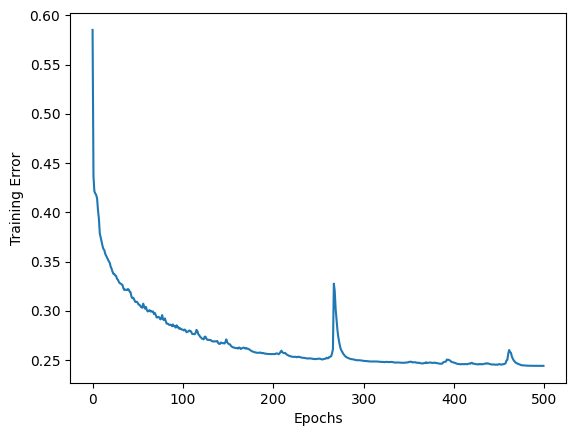

In [16]:
model_DAE.compile(optimizer='adam', loss='binary_crossentropy')

hist = model_DAE.fit(train_image, train_sketch_image,
                epochs=500,
                batch_size=128,
                shuffle=True,
                validation_data=(test_image, test_sketch_image))

plt.plot(hist.history["loss"]);
plt.xlabel('Epochs');
plt.ylabel('Training Error');

Text(0, 0.5, 'Loss')

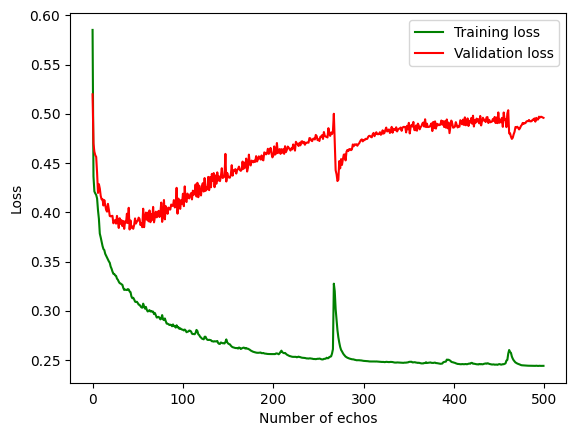

In [19]:
plt.plot(hist.history['loss'], color='green')
plt.plot(hist.history['val_loss'], color='red')
plt.legend(['Training loss', 'Validation loss'])
plt.xlabel('Number of echos')
plt.ylabel('Loss')

In [ ]:
sam()

1/4 [======>.......................] - ETA: 0s

2023-03-12 19:26:22.119153: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/4 [======>.......................] - ETA: 0s

2023-03-12 19:26:22.916913: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 91ms/step


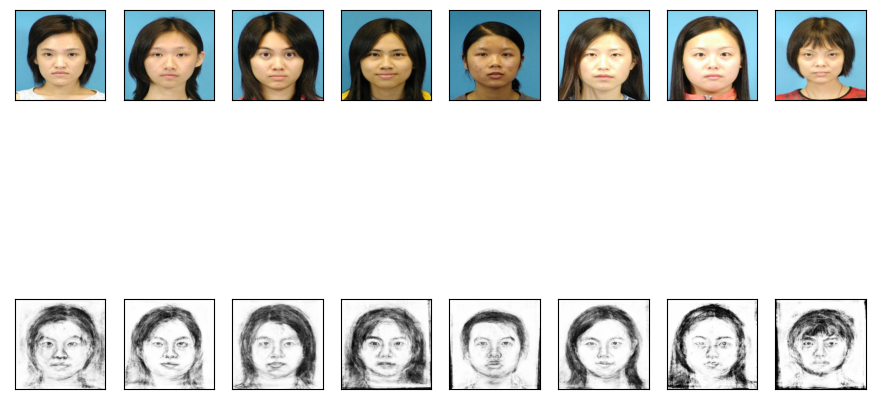

In [20]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = model_DAE_encoder.predict(test_image)
decoded_imgs = model_DAE_decoder.predict(encoded_imgs)

n = 18  # How many digits we will display
plt.figure(figsize=(25, 6))
for i in range(10, n, 1):
    # Display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(test_image[i].reshape(256, 256,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(256, 256,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [21]:
from sewar.full_ref import uqi

uqi(test_image, decoded_imgs)

0.7999146311435786

In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

MAE_Array = []
for i in range(len(test_image)):
    MAE_Data = mean_absolute_error(test_image[i], decoded_imgs[i])
    MAE_Array.append(MAE_Data)

rmsArray = []
for i in range(len(test_image)):
    rms = mean_squared_error(test_image[i], decoded_imgs[i], squared=False)
    rmsArray.append(rms)

mapeArray = []
for i in range(len(test_image)):
    mape = mean_squared_error(test_image[i], decoded_imgs[i], squared=False)
    mapeArray.append(mape)

print(MAE_Data)
print(rms)
print(mape)

0.3514116
0.4212367
0.4212367


Text(0, 0.5, 'Training Error')

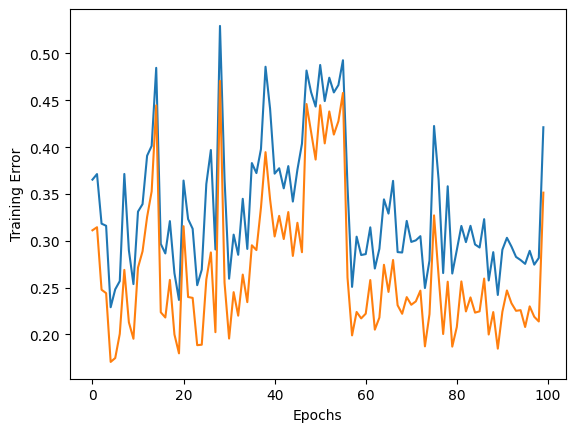

In [27]:
plt.plot(rmsArray)
plt.plot(MAE_Array)
#plt.plot(mapeArray)
plt.xlabel('Epochs')
plt.ylabel('Training Error')

In [31]:
from skimage.metrics import structural_similarity as ssim

SSIM_Array = []
for i in range(len(test_image)):
    SSIM_Data = ssim(test_image[i], decoded_imgs[i])
    SSIM_Array.append(SSIM_Data)


ValueError: Since image dtype is floating point, you must specify the data_range parameter. Please read the documentation carefully (including the note). It is recommended that you always specify the data_range anyway.

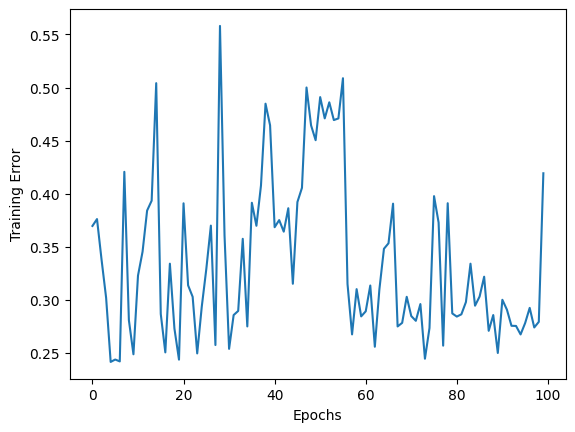

In [26]:
plt.plot(SSIM_Array);
plt.xlabel('Epochs');
plt.ylabel('Training Error');

In [32]:
from sklearn.metrics import mean_absolute_error

MAE_Array = []
for i in range(len(test_image)):
    MAE_Data = mean_absolute_error(test_image[i], decoded_imgs[i])
    MAE_Array.append(MAE_Data)

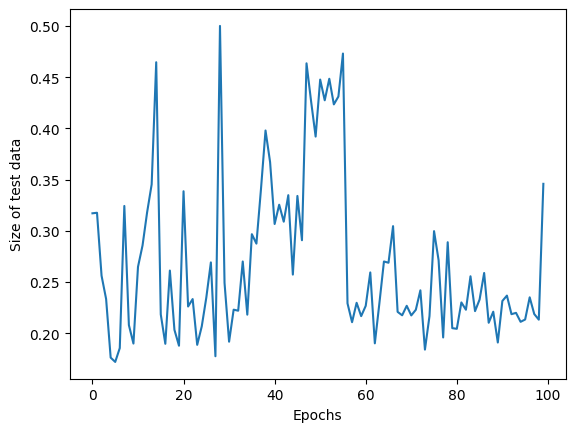

In [34]:
plt.plot(MAE_Array);
plt.xlabel('Epochs');
plt.ylabel('Size of test data');

In [1]:
from skimage.metrics import structural_similarity

structural_similarity

In [ ]:
import numpy as np
from scipy import signal
from math import log2, log10
from scipy.ndimage import generic_laplace,uniform_filter,correlate,gaussian_filter
from .utils import _initial_check,_get_sigmas,_get_sums,Filter,_replace_value,fspecial,filter2,_power_complex,_compute_bef

def mse (GT,P):
	"""calculates mean squared error (mse).
	:param GT: first (original) input image.
	:param P: second (deformed) input image.
	:returns:  float -- mse value.
	"""
	GT,P = _initial_check(GT,P)
	return np.mean((GT.astype(np.float64)-P.astype(np.float64))**2)

def rmse (GT,P):
	"""calculates root mean squared error (rmse).
	:param GT: first (original) input image.
	:param P: second (deformed) input image.
	:returns:  float -- rmse value.
	"""
	GT,P = _initial_check(GT,P)
	return np.sqrt(mse(GT,P))

def _rmse_sw_single (GT,P,ws):	
	errors = (GT-P)**2
	errors = uniform_filter(errors.astype(np.float64),ws)
	rmse_map = np.sqrt(errors)
	s = int(np.round((ws/2)))
	return np.mean(rmse_map[s:-s,s:-s]),rmse_map

def rmse_sw (GT,P,ws=8):
	"""calculates root mean squared error (rmse) using sliding window.
	:param GT: first (original) input image.
	:param P: second (deformed) input image.
	:param ws: sliding window size (default = 8).
	:returns:  tuple -- rmse value,rmse map.	
	"""
	GT,P = _initial_check(GT,P)

	rmse_map = np.zeros(GT.shape)
	vals = np.zeros(GT.shape[2])
	for i in range(GT.shape[2]):
		vals[i],rmse_map[:,:,i] = _rmse_sw_single (GT[:,:,i],P[:,:,i],ws) 

	return np.mean(vals),rmse_map

def psnr (GT,P,MAX=None):
	"""calculates peak signal-to-noise ratio (psnr).
	:param GT: first (original) input image.
	:param P: second (deformed) input image.
	:param MAX: maximum value of datarange (if None, MAX is calculated using image dtype).
	:returns:  float -- psnr value in dB.
	"""
	if MAX is None:
		MAX = np.iinfo(GT.dtype).max

	GT,P = _initial_check(GT,P)

	mse_value = mse(GT,P)
	if mse_value == 0.:
		return np.inf
	return 10 * np.log10(MAX**2 /mse_value)

def _uqi_single(GT,P,ws):
	N = ws**2
	window = np.ones((ws,ws))

	GT_sq = GT*GT
	P_sq = P*P
	GT_P = GT*P

	GT_sum = uniform_filter(GT, ws)    
	P_sum =  uniform_filter(P, ws)     
	GT_sq_sum = uniform_filter(GT_sq, ws)  
	P_sq_sum = uniform_filter(P_sq, ws)  
	GT_P_sum = uniform_filter(GT_P, ws)

	GT_P_sum_mul = GT_sum*P_sum
	GT_P_sum_sq_sum_mul = GT_sum*GT_sum + P_sum*P_sum
	numerator = 4*(N*GT_P_sum - GT_P_sum_mul)*GT_P_sum_mul
	denominator1 = N*(GT_sq_sum + P_sq_sum) - GT_P_sum_sq_sum_mul
	denominator = denominator1*GT_P_sum_sq_sum_mul

	q_map = np.ones(denominator.shape)
	index = np.logical_and((denominator1 == 0) , (GT_P_sum_sq_sum_mul != 0))
	q_map[index] = 2*GT_P_sum_mul[index]/GT_P_sum_sq_sum_mul[index]
	index = (denominator != 0)
	q_map[index] = numerator[index]/denominator[index]

	s = int(np.round(ws/2))
	return np.mean(q_map[s:-s,s:-s])

def uqi (GT,P,ws=8):
	"""calculates universal image quality index (uqi).
	:param GT: first (original) input image.
	:param P: second (deformed) input image.
	:param ws: sliding window size (default = 8).
	:returns:  float -- uqi value.
	"""
	GT,P = _initial_check(GT,P)
	return np.mean([_uqi_single(GT[:,:,i],P[:,:,i],ws) for i in range(GT.shape[2])])

def _ssim_single (GT,P,ws,C1,C2,fltr_specs,mode):
	win = fspecial(**fltr_specs)

	GT_sum_sq,P_sum_sq,GT_P_sum_mul = _get_sums(GT,P,win,mode)
	sigmaGT_sq,sigmaP_sq,sigmaGT_P = _get_sigmas(GT,P,win,mode,sums=(GT_sum_sq,P_sum_sq,GT_P_sum_mul))

	assert C1 > 0
	assert C2 > 0

	ssim_map = ((2*GT_P_sum_mul + C1)*(2*sigmaGT_P + C2))/((GT_sum_sq + P_sum_sq + C1)*(sigmaGT_sq + sigmaP_sq + C2))
	cs_map = (2*sigmaGT_P + C2)/(sigmaGT_sq + sigmaP_sq + C2)

	
	return np.mean(ssim_map), np.mean(cs_map)


def ssim (GT,P,ws=11,K1=0.01,K2=0.03,MAX=None,fltr_specs=None,mode='valid'):
	"""calculates structural similarity index (ssim).
	:param GT: first (original) input image.
	:param P: second (deformed) input image.
	:param ws: sliding window size (default = 8).
	:param K1: First constant for SSIM (default = 0.01).
	:param K2: Second constant for SSIM (default = 0.03).
	:param MAX: Maximum value of datarange (if None, MAX is calculated using image dtype).
	:returns:  tuple -- ssim value, cs value.
	"""
	if MAX is None:
		MAX = np.iinfo(GT.dtype).max

	GT,P = _initial_check(GT,P)

	if fltr_specs is None:
		fltr_specs=dict(fltr=Filter.UNIFORM,ws=ws)

	C1 = (K1*MAX)**2
	C2 = (K2*MAX)**2

	ssims = []
	css = []
	for i in range(GT.shape[2]):
		ssim,cs = _ssim_single(GT[:,:,i],P[:,:,i],ws,C1,C2,fltr_specs,mode)
		ssims.append(ssim)
		css.append(cs)
	return np.mean(ssims),np.mean(css)


def ergas(GT,P,r=4,ws=8):
	"""calculates erreur relative globale adimensionnelle de synthese (ergas).
	:param GT: first (original) input image.
	:param P: second (deformed) input image.
	:param r: ratio of high resolution to low resolution (default=4).
	:param ws: sliding window size (default = 8).
	:returns:  float -- ergas value.
	"""
	GT,P = _initial_check(GT,P)

	rmse_map = None
	nb = 1

	_,rmse_map = rmse_sw(GT,P,ws)

	means_map = uniform_filter(GT,ws)/ws**2

	# Avoid division by zero
	idx = means_map == 0
	means_map[idx] = 1
	rmse_map[idx] = 0

	ergasroot = np.sqrt(np.sum(((rmse_map**2)/(means_map**2)),axis=2)/nb)
	ergas_map = 100*r*ergasroot;

	s = int(np.round(ws/2))
	return np.mean(ergas_map[s:-s,s:-s])

def _scc_single(GT,P,win,ws):
	def _scc_filter(inp, axis, output, mode, cval):
		return correlate(inp, win , output, mode, cval, 0)

	GT_hp = generic_laplace(GT.astype(np.float64), _scc_filter)
	P_hp = generic_laplace(P.astype(np.float64), _scc_filter)
	win = fspecial(Filter.UNIFORM,ws)
	sigmaGT_sq,sigmaP_sq,sigmaGT_P = _get_sigmas(GT_hp,P_hp,win)

	sigmaGT_sq[sigmaGT_sq<0] = 0
	sigmaP_sq[sigmaP_sq<0] = 0

	den = np.sqrt(sigmaGT_sq) * np.sqrt(sigmaP_sq)
	idx = (den==0)
	den = _replace_value(den,0,1)
	scc = sigmaGT_P / den
	scc[idx] = 0
	return scc

def scc(GT,P,win=[[-1,-1,-1],[-1,8,-1],[-1,-1,-1]],ws=8):
	"""calculates spatial correlation coefficient (scc).
	:param GT: first (original) input image.
	:param P: second (deformed) input image.
	:param fltr: high pass filter for spatial processing (default=[[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]).
	:param ws: sliding window size (default = 8).
	:returns:  float -- scc value.
	"""
	GT,P = _initial_check(GT,P)

	coefs = np.zeros(GT.shape)
	for i in range(GT.shape[2]):
		coefs[:,:,i] = _scc_single(GT[:,:,i],P[:,:,i],win,ws)
	return np.mean(coefs)


def rase(GT,P,ws=8):
	"""calculates relative average spectral error (rase).
	:param GT: first (original) input image.
	:param P: second (deformed) input image.
	:param ws: sliding window size (default = 8).
	:returns:  float -- rase value.
	"""
	GT,P = _initial_check(GT,P)

	_,rmse_map = rmse_sw(GT,P,ws)

	GT_means = uniform_filter(GT, ws)/ws**2


	N = GT.shape[2]
	M = np.sum(GT_means,axis=2)/N
	rase_map = (100./M) * np.sqrt( np.sum(rmse_map**2,axis=2) / N )

	s = int(np.round(ws/2))
	return np.mean(rase_map[s:-s,s:-s])


def sam (GT,P):
	"""calculates spectral angle mapper (sam).
	:param GT: first (original) input image.
	:param P: second (deformed) input image.
	:returns:  float -- sam value.
	"""
	GT,P = _initial_check(GT,P)

	GT = GT.reshape((GT.shape[0]*GT.shape[1],GT.shape[2]))
	P = P.reshape((P.shape[0]*P.shape[1],P.shape[2]))

	N = GT.shape[1]
	sam_angles = np.zeros(N)
	for i in range(GT.shape[1]):
		val = np.clip(np.dot(GT[:,i],P[:,i]) / (np.linalg.norm(GT[:,i])*np.linalg.norm(P[:,i])),-1,1)		
		sam_angles[i] = np.arccos(val)

	return np.mean(sam_angles)



def msssim (GT,P,weights = [0.0448, 0.2856, 0.3001, 0.2363, 0.1333],ws=11,K1=0.01,K2=0.03,MAX=None):
	"""calculates multi-scale structural similarity index (ms-ssim).
	:param GT: first (original) input image.
	:param P: second (deformed) input image.
	:param weights: weights for each scale (default = [0.0448, 0.2856, 0.3001, 0.2363, 0.1333]).
	:param ws: sliding window size (default = 11).
	:param K1: First constant for SSIM (default = 0.01).
	:param K2: Second constant for SSIM (default = 0.03).
	:param MAX: Maximum value of datarange (if None, MAX is calculated using image dtype).
	:returns:  float -- ms-ssim value.
	"""
	if MAX is None:
		MAX = np.iinfo(GT.dtype).max

	GT,P = _initial_check(GT,P)

	scales = len(weights)

	fltr_specs = dict(fltr=Filter.GAUSSIAN,sigma=1.5,ws=11)

	if isinstance(weights, list):
		weights = np.array(weights)

	mssim = []
	mcs = []
	for _ in range(scales):
		_ssim, _cs = ssim(GT, P, ws=ws,K1=K1,K2=K2,MAX=MAX,fltr_specs=fltr_specs)
		mssim.append(_ssim)
		mcs.append(_cs)

		filtered = [uniform_filter(im, 2) for im in [GT, P]]
		GT, P = [x[::2, ::2, :] for x in filtered]

	mssim = np.array(mssim,dtype=np.float64)
	mcs = np.array(mcs,dtype=np.float64)

	return np.prod(_power_complex(mcs[:scales-1],weights[:scales-1])) * _power_complex(mssim[scales-1],weights[scales-1])


def _vifp_single(GT,P,sigma_nsq):
	EPS = 1e-10
	num =0.0
	den =0.0
	for scale in range(1,5):
		N=2.0**(4-scale+1)+1
		win = fspecial(Filter.GAUSSIAN,ws=N,sigma=N/5)

		if scale >1:
			GT = filter2(GT,win,'valid')[::2, ::2]
			P = filter2(P,win,'valid')[::2, ::2]

		GT_sum_sq,P_sum_sq,GT_P_sum_mul = _get_sums(GT,P,win,mode='valid')
		sigmaGT_sq,sigmaP_sq,sigmaGT_P = _get_sigmas(GT,P,win,mode='valid',sums=(GT_sum_sq,P_sum_sq,GT_P_sum_mul))


		sigmaGT_sq[sigmaGT_sq<0]=0
		sigmaP_sq[sigmaP_sq<0]=0

		g=sigmaGT_P /(sigmaGT_sq+EPS)
		sv_sq=sigmaP_sq-g*sigmaGT_P
		
		g[sigmaGT_sq<EPS]=0
		sv_sq[sigmaGT_sq<EPS]=sigmaP_sq[sigmaGT_sq<EPS]
		sigmaGT_sq[sigmaGT_sq<EPS]=0
		
		g[sigmaP_sq<EPS]=0
		sv_sq[sigmaP_sq<EPS]=0
		
		sv_sq[g<0]=sigmaP_sq[g<0]
		g[g<0]=0
		sv_sq[sv_sq<=EPS]=EPS
		
	
		num += np.sum(np.log10(1.0+(g**2.)*sigmaGT_sq/(sv_sq+sigma_nsq)))
		den += np.sum(np.log10(1.0+sigmaGT_sq/sigma_nsq))

	return num/den

def vifp(GT,P,sigma_nsq=2):
	"""calculates Pixel Based Visual Information Fidelity (vif-p).
	:param GT: first (original) input image.
	:param P: second (deformed) input image.
	:param sigma_nsq: variance of the visual noise (default = 2)
	:returns:  float -- vif-p value.
	"""
	GT,P = _initial_check(GT,P)
	# GT,P = GT[:,:,np.newaxis],P[:,:,np.newaxis]
	return np.mean([_vifp_single(GT[:,:,i],P[:,:,i],sigma_nsq) for i in range(GT.shape[2])])


def psnrb(GT, P):
	"""Calculates PSNR with Blocking Effect Factor for a given pair of images (PSNR-B)
	:param GT: first (original) input image in YCbCr format or Grayscale.
	:param P: second (corrected) input image in YCbCr format or Grayscale..
	:return: float -- psnr_b.
	"""
	if len(GT.shape) == 3:
		GT = GT[:, :, 0]

	if len(P.shape) == 3:
		P = P[:, :, 0]

	imdff = np.double(GT) - np.double(P)

	mse = np.mean(np.square(imdff.flatten()))
	bef = _compute_bef(P)
	mse_b = mse + bef

	if np.amax(P) > 2:
		psnr_b = 10 * log10(255**2/mse_b)
	else:
		psnr_b = 10 * log10(1/mse_b)

	return psnr_b